In [18]:
import requests
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup  
from selenium import webdriver
import copy
import random
from collections import defaultdict
import time



In [19]:
url = 'https://ksa.yallamotor.com/new-cars/search'

driver = webdriver.Firefox(executable_path=r'geckodriver/geckodriver.exe')

driver.get(url)
page = driver.page_source
soup = BeautifulSoup(page,'html.parser')

<ipython-input-19-f7d6a1f80ceb>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=r'geckodriver/geckodriver.exe')


##### Gets the urls of the cars and attach it to the main url

In [20]:

all_ksa_urls = []
def getUrls(urls, link_location='rightbuttons',main_tag='div',link_tag='class',master_link='https://ksa.yallamotor.com'):
    items= soup.find_all(main_tag, attrs={link_tag:link_location})
    for i in range(len(items)):
        urls.append(master_link+items[i].a['href'])
    urls = copy.deepcopy(list(set(urls)))#removing duplicated links
    return urls


In [21]:
all_ksa_urls = getUrls(all_ksa_urls)
print('length of initial urls:', len(all_ksa_urls))
all_ksa_urls

length of initial urls: 15


['https://ksa.yallamotor.com/new-cars/ford/bronco/2-7t-outer-banks',
 'https://ksa.yallamotor.com/new-cars/suzuki/jimny/1-5l-m-t',
 'https://ksa.yallamotor.com/new-cars/renault/koleos/2-5l-le-4wd',
 'https://ksa.yallamotor.com/new-cars/honda/hr-v/1-8-i-vtec-dx',
 'https://ksa.yallamotor.com/new-cars/suzuki/jimny/1-5l-automatic',
 'https://ksa.yallamotor.com/new-cars/gac/gs3/1-3t-ge',
 'https://ksa.yallamotor.com/new-cars/fiat/500e/la-prima',
 'https://ksa.yallamotor.com/new-cars/honda/hr-v/1-8-i-vtec-ex',
 'https://ksa.yallamotor.com/new-cars/honda/hr-v/1-8-i-vtec-lx',
 'https://ksa.yallamotor.com/new-cars/gmc/yukon-xl/5-3l-v8-slt-awd',
 'https://ksa.yallamotor.com/new-cars/peugeot/traveller/l3-vip',
 'https://ksa.yallamotor.com/new-cars/peugeot/expert/van-l3-a-t',
 'https://ksa.yallamotor.com/new-cars/peugeot/2008/1-2t-allure-155hp',
 'https://ksa.yallamotor.com/new-cars/peugeot/expert/van-l3-m-t',
 'https://ksa.yallamotor.com/new-cars/ford/bronco/2-3t-big-bend']

##### This function is to move through the main pages to collect the urls

In [22]:
def Move(i,country='ksa'): 
    global soup  
    new_url = f"https://{country}.yallamotor.com/new-cars/search?page={i}&sort=price_asc"
    driver.get(new_url)
    
    page = driver.page_source
    soup = BeautifulSoup(page,'html.parser')
    return new_url

##### Testing the Seed to start the movement and to mark the starting page

In [23]:
all_ksa_urls = []

driver.get(url)
page = driver.page_source
soup = BeautifulSoup(page,'html.parser')
all_ksa_urls = getUrls(all_ksa_urls)
print('length of initial urls:', len(all_ksa_urls))
all_ksa_urls

length of initial urls: 15


['https://ksa.yallamotor.com/new-cars/ford/bronco/2-7t-outer-banks',
 'https://ksa.yallamotor.com/new-cars/suzuki/jimny/1-5l-m-t',
 'https://ksa.yallamotor.com/new-cars/renault/koleos/2-5l-le-4wd',
 'https://ksa.yallamotor.com/new-cars/honda/hr-v/1-8-i-vtec-dx',
 'https://ksa.yallamotor.com/new-cars/suzuki/jimny/1-5l-automatic',
 'https://ksa.yallamotor.com/new-cars/gac/gs3/1-3t-ge',
 'https://ksa.yallamotor.com/new-cars/fiat/500e/la-prima',
 'https://ksa.yallamotor.com/new-cars/honda/hr-v/1-8-i-vtec-ex',
 'https://ksa.yallamotor.com/new-cars/honda/hr-v/1-8-i-vtec-lx',
 'https://ksa.yallamotor.com/new-cars/gmc/yukon-xl/5-3l-v8-slt-awd',
 'https://ksa.yallamotor.com/new-cars/peugeot/traveller/l3-vip',
 'https://ksa.yallamotor.com/new-cars/peugeot/expert/van-l3-a-t',
 'https://ksa.yallamotor.com/new-cars/peugeot/2008/1-2t-allure-155hp',
 'https://ksa.yallamotor.com/new-cars/peugeot/expert/van-l3-m-t',
 'https://ksa.yallamotor.com/new-cars/ford/bronco/2-3t-big-bend']

In [24]:
#getting all the URLs when reaches the end of the list
#of sites, ends with and error.
def scrape(theURLS,max_pages=84, moving_link='starting',i=2, country='ksa', master_link='https://ksa.yallamotor.com',update=10, progress = 1):
    global url
    print(url)
    #Seed to starting the movement and to mark the starting page        
    driver.get(url)
    page = driver.page_source
    soup = BeautifulSoup(page,'html.parser')
    theURLS = getUrls(theURLS,master_link=master_link)
    print('length of initial urls:', len(theURLS))
    
    while(True):
        try:
            moving_link = Move(i,country=country)
            if not i % update:
                print("At:", moving_link)
            theURLS = getUrls(theURLS,master_link=master_link)
            if not i % update:
                print('Num of urls:', len(theURLS))
            if not i % progress:
                print("Done", i)
            i +=1
            if i == max_pages+1:
                print("Total number:", len(theURLS))
                return theURLS
        except ValueError as e:
            print(e)


## KSA

In [8]:
url = 'https://ksa.yallamotor.com/new-cars/search'
all_ksa_urls = []
all_ksa_urls = scrape(all_ksa_urls, max_pages=82, update=40, progress = 20)
print("Total cars:", len(all_ksa_urls))
print("Sample links:", all_ksa_urls[:10])

https://ksa.yallamotor.com/new-cars/search
length of initial urls: 15
Done 20
At: https://ksa.yallamotor.com/new-cars/search?page=40&sort=price_asc
Num of urls: 600
Done 40
Done 60
At: https://ksa.yallamotor.com/new-cars/search?page=80&sort=price_asc
Num of urls: 1200
Done 80
Total number: 1217
Total cars: 1217
Sample links: ['https://ksa.yallamotor.com/new-cars/mini/convertible/cooper', 'https://ksa.yallamotor.com/new-cars/porsche/panamera/turbo-executive', 'https://ksa.yallamotor.com/new-cars/suzuki/jimny/1-5l-m-t', 'https://ksa.yallamotor.com/new-cars/alfa-romeo/stelvio/quadrifoglio', 'https://ksa.yallamotor.com/new-cars/bmw/4-series-gran-coupe/440i', 'https://ksa.yallamotor.com/new-cars/bmw/i8/plug-in-hybrid', 'https://ksa.yallamotor.com/new-cars/hyundai/creta/1-6l-mid', 'https://ksa.yallamotor.com/new-cars/lincoln/crosair/2-0t-base', 'https://ksa.yallamotor.com/new-cars/nissan/pathfinder/2022/3-5l-s-4wd', 'https://ksa.yallamotor.com/new-cars/infiniti/q70/3-7l-luxe']


## UAE

In [9]:
url = 'https://uae.yallamotor.com/new-cars/search'
all_uae_urls = []
all_uae_urls = scrape(all_uae_urls,country='uae', max_pages=96, master_link='https://uae.yallamotor.com/', update = 50, progress=25)
print("Total cars:", len(all_uae_urls))
print("Sample links:", all_uae_urls[:10])

https://uae.yallamotor.com/new-cars/search
length of initial urls: 2
Done 25
At: https://uae.yallamotor.com/new-cars/search?page=50&sort=price_asc
Num of urls: 732
Done 50
Done 75
Total number: 1412
Total cars: 1412
Sample links: ['https://uae.yallamotor.com//new-cars/nissan/pathfinder/2022/3-5l-sv-4wd', 'https://uae.yallamotor.com//new-cars/hyundai/elantra/1-6l-smart', 'https://uae.yallamotor.com//new-cars/nissan/370z/coupe-a-t-full-option', 'https://uae.yallamotor.com//new-cars/chevrolet/silverado/6-6l-ltz-heavy-duty', 'https://uae.yallamotor.com//new-cars/porsche/911/gt3', 'https://uae.yallamotor.com//new-cars/nissan/patrol/5-6l-le-t2', 'https://uae.yallamotor.com//new-cars/lexus/es/350-f-sport', 'https://uae.yallamotor.com//new-cars/hyundai/h1/12-seater-wagon-a-t-high', 'https://uae.yallamotor.com//new-cars/volvo/xc40/2-0t-t5-fwd-momentum', 'https://uae.yallamotor.com//new-cars/honda/pilot/3-5-ex-l-awd']


## Bahrain

In [10]:
url = 'https://bahrain.yallamotor.com/new-cars/search'
all_bah_urls = []
all_bah_urls = scrape(all_bah_urls,country='bahrain', max_pages=69, master_link='https://bahrain.yallamotor.com/', update = 35, progress=15)
print("Total cars:", len(all_bah_urls))
print("Sample links:", all_bah_urls[:10])

https://bahrain.yallamotor.com/new-cars/search
length of initial urls: 8
Done 15
Done 30
At: https://bahrain.yallamotor.com/new-cars/search?page=35&sort=price_asc
Num of urls: 515
Done 45
Done 60
Total number: 1010
Total cars: 1010
Sample links: ['https://bahrain.yallamotor.com//new-cars/bmw/x1/sdrive20i', 'https://bahrain.yallamotor.com//new-cars/mercedes-benz/s-65-amg/6-0l-v12-630-hp', 'https://bahrain.yallamotor.com//new-cars/cadillac/xt5/2-0t-luxury', 'https://bahrain.yallamotor.com//new-cars/gac/gn8/2-0t-gl', 'https://bahrain.yallamotor.com//new-cars/bmw/m4-coupe/3-0t', 'https://bahrain.yallamotor.com//new-cars/porsche/911/targa-4', 'https://bahrain.yallamotor.com//new-cars/land-rover/range-rover/5-0l-v8-vogue-se-lwb-525-ps', 'https://bahrain.yallamotor.com//new-cars/haval/h9/comfort', 'https://bahrain.yallamotor.com//new-cars/audi/s5-coupe/3-0-tfsi-quattro-354-hp', 'https://bahrain.yallamotor.com//new-cars/porsche/911/carrera-4-cabriolet']


## Kuwait

In [11]:
url = 'https://kuwait.yallamotor.com/new-cars/search'
all_kuw_urls = []
all_kuw_urls = scrape(all_kuw_urls,country='kuwait', max_pages=71, master_link='https://kuwait.yallamotor.com/', update = 35, progress=15)
print("Total cars:", len(all_kuw_urls))
print("Sample links:", all_kuw_urls[:10])

https://kuwait.yallamotor.com/new-cars/search
length of initial urls: 1
Done 15
Done 30
At: https://kuwait.yallamotor.com/new-cars/search?page=35&sort=price_asc
Num of urls: 511
Done 45
Done 60
At: https://kuwait.yallamotor.com/new-cars/search?page=70&sort=price_asc
Num of urls: 1035
Total number: 1038
Total cars: 1038
Sample links: ['https://kuwait.yallamotor.com//new-cars/mercedes-benz/glc-coupe/amg-43-4matic', 'https://kuwait.yallamotor.com//new-cars/land-rover/range-rover/5-0l-v8-vogue-se-525-ps', 'https://kuwait.yallamotor.com//new-cars/ford/ecosport/1-5-titanium', 'https://kuwait.yallamotor.com//new-cars/kia/sonet/1-0t-gdi-a-t', 'https://kuwait.yallamotor.com//new-cars/mercedes-benz/e-class-saloon/e-250', 'https://kuwait.yallamotor.com//new-cars/cadillac/ct4/2-0t-sport', 'https://kuwait.yallamotor.com//new-cars/bmw/x7/xdrive50i', 'https://kuwait.yallamotor.com//new-cars/acura/tlx/3-5l-v6-advanced-package', 'https://kuwait.yallamotor.com//new-cars/mg/5/1-5l-com', 'https://kuwait.y

## Oman

In [12]:
url = 'https://oman.yallamotor.com/new-cars/search'
all_oma_urls = []
all_oma_urls = scrape(all_oma_urls,country='oman', max_pages=69, master_link='https://oman.yallamotor.com/', update = 35, progress=15)
print("Total cars:", len(all_oma_urls))
print("Sample links:", all_oma_urls[:10])

https://oman.yallamotor.com/new-cars/search
length of initial urls: 3
Done 15
Done 30
At: https://oman.yallamotor.com/new-cars/search?page=35&sort=price_asc
Num of urls: 513
Done 45
Done 60
Total number: 1015
Total cars: 1015
Sample links: ['https://oman.yallamotor.com//new-cars/lexus/nx/200t-exclusive', 'https://oman.yallamotor.com//new-cars/chevrolet/camaro-coupe/6-2l-zl1', 'https://oman.yallamotor.com//new-cars/renault/koleos/2-5l-pe', 'https://oman.yallamotor.com//new-cars/ford/mustang/5-0l-v8-convertible-gt-premium', 'https://oman.yallamotor.com//new-cars/chevrolet/equinox/1-5t-lt-fwd', 'https://oman.yallamotor.com//new-cars/lexus/is-c/350-prestige', 'https://oman.yallamotor.com//new-cars/land-rover/range-rover-evoque/2-0t-r-dynamic-hse-300-ps', 'https://oman.yallamotor.com//new-cars/ford/f-150/3-3l-v6-xlt-sport-r-c', 'https://oman.yallamotor.com//new-cars/morgan/plus-8/4-8l-manual', 'https://oman.yallamotor.com//new-cars/toyota/corolla/1-8l-xli-hybrid']


## Qatar

In [13]:
url = 'https://qatar.yallamotor.com/new-cars/search'
all_qta_urls = []
all_qta_urls = scrape(all_qta_urls,country='qatar', max_pages=70, master_link='https://qatar.yallamotor.com/',update = 35, progress = 15)
print("Total cars:", len(all_qta_urls))
print("Sample links:", all_qta_urls[:10])

https://qatar.yallamotor.com/new-cars/search
length of initial urls: 7
Done 15
Done 30
At: https://qatar.yallamotor.com/new-cars/search?page=35&sort=price_asc
Num of urls: 517
Done 45
Done 60
At: https://qatar.yallamotor.com/new-cars/search?page=70&sort=price_asc
Num of urls: 1034
Total number: 1034
Total cars: 1034
Sample links: ['https://qatar.yallamotor.com//new-cars/nissan/navara/2-5l-asf-4x2-m-t', 'https://qatar.yallamotor.com//new-cars/lexus/gs/350-f-sport', 'https://qatar.yallamotor.com//new-cars/ford/ranger/2-5l-single-cab', 'https://qatar.yallamotor.com//new-cars/bmw/3-series/340i', 'https://qatar.yallamotor.com//new-cars/haval/h6/2022/2-0t-supreme-4wd', 'https://qatar.yallamotor.com//new-cars/bentley/flying-spur/4-0t-v8', 'https://qatar.yallamotor.com//new-cars/renault/talisman/2-0l-pe', 'https://qatar.yallamotor.com//new-cars/maxus/v80-18-seater/2-5l-passenger-van-m-t', 'https://qatar.yallamotor.com//new-cars/gmc/acadia-denali/3-6l-v6-awd', 'https://qatar.yallamotor.com//new

## Egypt

In [14]:
url = 'https://egypt.yallamotor.com/new-cars/search'
all_egy_urls = []
all_egy_urls = scrape(all_egy_urls,country='egypt', max_pages=35, master_link='https://egypt.yallamotor.com/',update = 15, progress = 7)
print("Total cars:", len(all_egy_urls))
print("Sample links:", all_egy_urls[:10])

https://egypt.yallamotor.com/new-cars/search
length of initial urls: 14
Done 7
Done 14
At: https://egypt.yallamotor.com/new-cars/search?page=15&sort=price_asc
Num of urls: 224
Done 21
Done 28
At: https://egypt.yallamotor.com/new-cars/search?page=30&sort=price_asc
Num of urls: 448
Done 35
Total number: 494
Total cars: 494
Sample links: ['https://egypt.yallamotor.com//new-cars/mg/5/1-5l-std', 'https://egypt.yallamotor.com//new-cars/bmw/x1/sdrive20i-m-sport-package', 'https://egypt.yallamotor.com//new-cars/toyota/corolla/1-6l-comfort', 'https://egypt.yallamotor.com//new-cars/soueast /dx3/1-5t-full-option', 'https://egypt.yallamotor.com//new-cars/mg/zs-ev/electric-suv', 'https://egypt.yallamotor.com//new-cars/aston-martin/rapide-amr/6-0l-v12', 'https://egypt.yallamotor.com//new-cars/peugeot/508/1-6t-gt-max', 'https://egypt.yallamotor.com//new-cars/mercedes-benz/c-class/2022/c-300', 'https://egypt.yallamotor.com//new-cars/changan/eado-dt/1-6l-l2', 'https://egypt.yallamotor.com//new-cars/por

### All the above countries combined

In [15]:
all_countries = all_ksa_urls + all_uae_urls + all_bah_urls + all_kuw_urls + all_oma_urls + all_qta_urls + all_egy_urls
random.shuffle(all_countries)# Shuffled to show links from different countries
print("Total cars:", len(all_countries))
print("Sample links from all countries:", all_countries[:10])

Total cars: 7220
Sample links from all countries: ['https://ksa.yallamotor.com/new-cars/ford/taurus/2-0l-ecoboost-trend', 'https://egypt.yallamotor.com//new-cars/seat/tarraco/1-4t-fr', 'https://uae.yallamotor.com//new-cars/tesla/model-3/performance-awd', 'https://kuwait.yallamotor.com//new-cars/hyundai/palisade/3-8l-gdi-fwd-comfort', 'https://uae.yallamotor.com//new-cars/kia/cerato/2-0l-sx', 'https://uae.yallamotor.com//new-cars/chevrolet/tahoe/5-3l-premium-4wd', 'https://kuwait.yallamotor.com//new-cars/toyota/innova/2-7l-limited', 'https://uae.yallamotor.com//new-cars/lexus/ls/500-titanium', 'https://kuwait.yallamotor.com//new-cars/porsche/911/turbo-s', 'https://kuwait.yallamotor.com//new-cars/bestune/t77/1-2t-comfort']


##### Saving the links to a file 

In [16]:
with open('dataLinks.txt', 'w') as f:
    for item in all_countries:
        f.write("%s\n" % item)

##### Making a copy of the list of links to work on.

In [17]:
dataLinks= copy.deepcopy(all_countries)
dataLinks[:10]

['https://ksa.yallamotor.com/new-cars/ford/taurus/2-0l-ecoboost-trend',
 'https://egypt.yallamotor.com//new-cars/seat/tarraco/1-4t-fr',
 'https://uae.yallamotor.com//new-cars/tesla/model-3/performance-awd',
 'https://kuwait.yallamotor.com//new-cars/hyundai/palisade/3-8l-gdi-fwd-comfort',
 'https://uae.yallamotor.com//new-cars/kia/cerato/2-0l-sx',
 'https://uae.yallamotor.com//new-cars/chevrolet/tahoe/5-3l-premium-4wd',
 'https://kuwait.yallamotor.com//new-cars/toyota/innova/2-7l-limited',
 'https://uae.yallamotor.com//new-cars/lexus/ls/500-titanium',
 'https://kuwait.yallamotor.com//new-cars/porsche/911/turbo-s',
 'https://kuwait.yallamotor.com//new-cars/bestune/t77/1-2t-comfort']

##### Opening the links of each Vehicle

In [25]:
link = 'https://ksa.yallamotor.com/new-cars/gmc/yukon-xl/5-3l-v8-slt-awd'
def open_link(link): 
    global soup  
    driver.get(link)
    page = driver.page_source
    soup = BeautifulSoup(page,'html.parser')
open_link(link)

##### Getting the Features and saving them as the default in 'features_names'

In [26]:
titles = soup.find_all('div', attrs={'class':'col is-7 p0'})
titles[0].text
len(titles)

13

In [27]:
values = soup.find_all('div', attrs={'class':'col is-5 p0 font-b'})
values[0].text
len(values)

13

In [28]:
features = soup.find_all('div', attrs={'class':'col is-6 display-flex'})
features[24].text.replace('\n','').replace(' ','')

'CentralLocking'

##### Building the dict of type list and the 'feature_name' list

In [22]:
data = defaultdict(list)
data
feature_names = []

##### Adding the values to 'feature_names'

In [23]:
for title in titles:
    feature_names.append(title.text)
print("number of features:",len(feature_names))

number of features: 13


In [24]:
for i in features:
    feature_names.append(i.text.replace('\n','').lstrip(' '))
print("number of features:",len(feature_names))

number of features: 81


##### Adding the features from 'feature_names' as keys to the dict with value -1 to be removed in EDA

In [25]:
for key in feature_names:
    data[key].append(-1)

##### Testing: getting data and adding it. If the vehicle has the feature then 1, otherwise 0.

In [26]:
titles_current = soup.find_all('div', attrs={'class':'col is-7 p0'})
values_current = soup.find_all('div', attrs={'class':'col is-5 p0 font-b'})
print(len(titles),len(values))

for (title, value) in zip(titles,values):
    if title.text not in feature_names:
        print("skipping unknown feature 01")
    data[title.text].append(value.text)
    
features_current = soup.find_all('div', attrs={'class':'col is-6 display-flex'})
for i in features_current[:-2]:
    i = i.text.replace('\n','').lstrip(' ')
    if i not in feature_names:
        print("skipping unknown feature 02")
        continue
    data[i].append(1)

data

13 13


defaultdict(list,
            {'Engine Capacity (liters)': [-1, '5.3'],
             'Cylinders': [-1, '8'],
             'Drive Type': [-1, 'All Wheel Drive'],
             'Fuel Type': [-1, 'Petrol'],
             'Horsepower (bhp)': [-1, '355'],
             'Torque (Nm)': [-1, '520'],
             'Transmission': [-1, 'Automatic'],
             'Seating Capacity': [-1, '7 Seater'],
             'Length (meters)': [-1, '5.720'],
             'Width (meters)': [-1, '2.057'],
             'Height (meters)': [-1, '1.943'],
             'Wheelbase (meters)': [-1, '3.414'],
             'Trunk Capacity (liters)': [-1, ''],
             'ABS (Anti-lock Brake System)': [-1, 1],
             'Airbags': [-1, 1],
             'Anti theft alarm': [-1, 1],
             'BA (Brake Assist)': [-1, 1],
             'Collision Detection': [-1, 1],
             'Differential Lock': [-1, 1],
             'EBD (Electronic Brakeforce Distribution)': [-1, 1],
             'Fire Extinguisher': [-1, 1],
  

##### Testing: getting the max length of each key's list. If less than max(missing values) fill with 0

In [27]:
max_len = -1
for k,v in data.items():
    if len(v) > max_len:
        max_len = len(v)
        
for k,v in data.items():
    if len(v) < max_len:
        data[k].append(0)
data

defaultdict(list,
            {'Engine Capacity (liters)': [-1, '5.3'],
             'Cylinders': [-1, '8'],
             'Drive Type': [-1, 'All Wheel Drive'],
             'Fuel Type': [-1, 'Petrol'],
             'Horsepower (bhp)': [-1, '355'],
             'Torque (Nm)': [-1, '520'],
             'Transmission': [-1, 'Automatic'],
             'Seating Capacity': [-1, '7 Seater'],
             'Length (meters)': [-1, '5.720'],
             'Width (meters)': [-1, '2.057'],
             'Height (meters)': [-1, '1.943'],
             'Wheelbase (meters)': [-1, '3.414'],
             'Trunk Capacity (liters)': [-1, ''],
             'ABS (Anti-lock Brake System)': [-1, 1],
             'Airbags': [-1, 1],
             'Anti theft alarm': [-1, 1],
             'BA (Brake Assist)': [-1, 1],
             'Collision Detection': [-1, 1],
             'Differential Lock': [-1, 1],
             'EBD (Electronic Brakeforce Distribution)': [-1, 1],
             'Fire Extinguisher': [-1, 1],
  

### Putting it together

In [29]:
link = 'https://ksa.yallamotor.com/new-cars/gmc/yukon-xl/5-3l-v8-slt-awd'
open_link(link)

##### Getting the data

In [30]:
def get_titles():
    global soup
    return soup.find_all('div', attrs={'class':'col is-7 p0'})

def get_values():
    global soup
    return soup.find_all('div', attrs={'class':'col is-5 p0 font-b'})

def get_rest_of_features():
    global soup
    return soup.find_all('div', attrs={'class':'col is-6 display-flex'})


In [31]:
titles_current = get_titles()
values_current = get_values()
features_current = get_rest_of_features()
print(len(titles_current),len(values_current), len(features_current))

13 13 68


##### Parsing the data

In [32]:
def add_title_value(data,titles,values):
    for (title, value) in zip(titles,values):
        if title.text not in feature_names:
            continue
        data[title.text].append(value.text)

def add_rest(data,features_current):
    for i in features_current:
        i = i.text.replace('\n','').lstrip(' ')
        if i not in feature_names:
            continue
        data[i].append(1)

In [33]:
add_title_value(data,titles_current,values_current)
add_rest(data,features_current)

##### Adding zero to the missing values

In [195]:
def get_max(data):
    max_len = -1
    for k,v in data.items():
        if len(v) > max_len:
            max_len = len(v)
    return max_len

def pad_zero(max_len):
    for k,v in data.items():
        i = 0
        while(len(v) < max_len):
            data[k].append(0)
    return data


In [ ]:
max_len = get_max(data)
data = pad_zero(max_len)

In [37]:
def default_feature_from_link(data,feature_names,links='https://ksa.yallamotor.com/new-cars/gmc/yukon-xl/5-3l-v8-slt-awd'):
    link = links
    open_link(link)
    titles = soup.find_all('div', attrs={'class':'col is-7 p0'})
    values = soup.find_all('div', attrs={'class':'col is-5 p0 font-b'})
    features = soup.find_all('div', attrs={'class':'col is-6 display-flex'})
    for title in titles:
        feature_names.append(title.text)
    print("initial number of features:",len(feature_names))
    for i in features:
        feature_names.append(i.text.replace('\n','').lstrip(' '))
    print("total number of features:",len(feature_names))
    for key in feature_names:
        data[key].append(-1)

### Since the code above works as intended. Then its time to get the data.

###### Lets clean the data
###### Lets get the features using the default link.

In [208]:
with open('dataLinks.txt') as f:
    lines = f.read().splitlines()
dataLinks = copy.deepcopy(lines)
dataLinks[:10]

['https://ksa.yallamotor.com/new-cars/ford/taurus/2-0l-ecoboost-trend',
 'https://egypt.yallamotor.com//new-cars/seat/tarraco/1-4t-fr',
 'https://uae.yallamotor.com//new-cars/tesla/model-3/performance-awd',
 'https://kuwait.yallamotor.com//new-cars/hyundai/palisade/3-8l-gdi-fwd-comfort',
 'https://uae.yallamotor.com//new-cars/kia/cerato/2-0l-sx',
 'https://uae.yallamotor.com//new-cars/chevrolet/tahoe/5-3l-premium-4wd',
 'https://kuwait.yallamotor.com//new-cars/toyota/innova/2-7l-limited',
 'https://uae.yallamotor.com//new-cars/lexus/ls/500-titanium',
 'https://kuwait.yallamotor.com//new-cars/porsche/911/turbo-s',
 'https://kuwait.yallamotor.com//new-cars/bestune/t77/1-2t-comfort']

In [209]:
data = defaultdict(list)
print(data)
feature_names = []
default_feature_from_link(data,feature_names)

defaultdict(<class 'list'>, {})
initial number of features: 13
total number of features: 81


#### Lets get all the data

In [210]:
def report(data):
    cols = []
    for key, v in data.items():
        cols.append(key)
        print("Key: len(Values) -> ", key, len(v))

In [211]:
#Over here im running the data scraping function
import time
counter = 0

def useLinks(data):
    global soup
    counter = 0
    data['name'].append(-1)
    data['price'].append(-1)
    data['currency'].append(-1)
    data['country'].append(-1)
    for current_link in dataLinks[:]:
        
        try:
            link = current_link
            open_link(link)
            titles_current = get_titles()
            values_current = get_values()
            features_current = get_rest_of_features()
            add_title_value(data,titles_current,values_current)
            add_rest(data,features_current)
            
            #adding the car name and country and price
            name = soup.find('h1', attrs={'class':'font24 font-b'})
            try:
                name = name.text.replace('\n','').lstrip(' ')
            except:
                name = f'Null__NAME'
                print('Invalid__Null__NAME', name, link)

            country = link.split('.')[0].split('/')[-1]

            currency_price = soup.find('div', attrs={'class':'m24t font-b font20'})
            try:
                price = currency_price.text.replace('\n','').lstrip(' ').split(' ')[1]
                currency = currency_price.text.replace('\n','').lstrip(' ').split(' ')[0]
            except:
                try:
                    price = currency_price.text.replace('\n','').lstrip(' ')
                    if country  == 'ksa':
                        currency = 'SAR'
                    elif country == 'uae':
                        currency = 'AED'
                    elif country == 'egypt':
                        currency = 'EGP'
                    elif country == 'bahrain':
                        currency = 'BHD'
                    elif country == 'kuwait':
                        currency = 'KWD'
                    elif country == 'oman':
                        currency = 'OMR'
                    elif country == 'qatar':
                        currency = 'QAR'
                    else:
                        currency = country
                except:
                    price = f'Null__PRICE'
                    print('Invalid__Null__PRICE', price, link)
                    currency = country                    

            data['name'].append(name)
            data['price'].append(price)
            data['currency'].append(currency)
            data['country'].append(country)
            
            max_len = get_max(data)
            data = pad_zero(max_len)
            
            counter += 1
            if not counter % 100 or counter == -1:
                print(f"At:{counter}")
                report(data)
            if not counter % 10:
                print('.')
                
        except ValueError as e:
            print("Error occured.... sleeping for 30 second. Error:",e)
            time.sleep(30)
            print("Continuing.")
    
useLinks(data)

.
.
.
.
.
.
.
.
.
At:100
Key: len(Values) ->  Engine Capacity (liters) 114
Key: len(Values) ->  Cylinders 114
Key: len(Values) ->  Drive Type 114
Key: len(Values) ->  Fuel Type 114
Key: len(Values) ->  Horsepower (bhp) 114
Key: len(Values) ->  Torque (Nm) 114
Key: len(Values) ->  Transmission 114
Key: len(Values) ->  Seating Capacity 114
Key: len(Values) ->  Length (meters) 114
Key: len(Values) ->  Width (meters) 114
Key: len(Values) ->  Height (meters) 114
Key: len(Values) ->  Wheelbase (meters) 114
Key: len(Values) ->  Trunk Capacity (liters) 114
Key: len(Values) ->  ABS (Anti-lock Brake System) 114
Key: len(Values) ->  Airbags 114
Key: len(Values) ->  Anti theft alarm 114
Key: len(Values) ->  BA (Brake Assist) 114
Key: len(Values) ->  Collision Detection 114
Key: len(Values) ->  Differential Lock 114
Key: len(Values) ->  EBD (Electronic Brakeforce Distribution) 114
Key: len(Values) ->  Fire Extinguisher 114
Key: len(Values) ->  First Aid Kit 114
Key: len(Values) ->  Gas Shock Absorb

In [214]:
print("done")

done


#### Total Data

In [217]:
report(data)

Key: len(Values) ->  Engine Capacity (liters) 7787
Key: len(Values) ->  Cylinders 7787
Key: len(Values) ->  Drive Type 7787
Key: len(Values) ->  Fuel Type 7787
Key: len(Values) ->  Horsepower (bhp) 7787
Key: len(Values) ->  Torque (Nm) 7787
Key: len(Values) ->  Transmission 7787
Key: len(Values) ->  Seating Capacity 7787
Key: len(Values) ->  Length (meters) 7787
Key: len(Values) ->  Width (meters) 7787
Key: len(Values) ->  Height (meters) 7787
Key: len(Values) ->  Wheelbase (meters) 7787
Key: len(Values) ->  Trunk Capacity (liters) 7787
Key: len(Values) ->  ABS (Anti-lock Brake System) 7787
Key: len(Values) ->  Airbags 7787
Key: len(Values) ->  Anti theft alarm 7787
Key: len(Values) ->  BA (Brake Assist) 7787
Key: len(Values) ->  Collision Detection 7787
Key: len(Values) ->  Differential Lock 7787
Key: len(Values) ->  EBD (Electronic Brakeforce Distribution) 7787
Key: len(Values) ->  Fire Extinguisher 7787
Key: len(Values) ->  First Aid Kit 7787
Key: len(Values) ->  Gas Shock Absorber 

#### Saving the data

In [220]:
df = pd.DataFrame.from_dict(data)
df.to_csv (r'raw_df.csv', index = False)

In [251]:
backup = copy.deepcopy(data)
df = pd.DataFrame.from_dict(data)
df.to_csv (r'raw_df_backup.csv', index = False)

In [252]:
data.keys()#0-13

dict_keys(['Engine Capacity (liters)', 'Cylinders', 'Drive Type', 'Fuel Type', 'Horsepower (bhp)', 'Torque (Nm)', 'Transmission', 'Seating Capacity', 'Length (meters)', 'Width (meters)', 'Height (meters)', 'Wheelbase (meters)', 'Trunk Capacity (liters)', 'ABS (Anti-lock Brake System)', 'Airbags', 'Anti theft alarm', 'BA (Brake Assist)', 'Collision Detection', 'Differential Lock', 'EBD (Electronic Brakeforce Distribution)', 'Fire Extinguisher', 'First Aid Kit', 'Gas Shock Absorber', 'Hill Assist', 'Hill Descent Control ', 'Immobilizer', 'ISO Fix Child Seat Anchors', 'Lane Departure Warning', 'Multi Terrain Select', 'Parking Sensors - Front and Rear', 'Pedestrian airbag', 'Rear Camera', 'Surround Camera', 'Tire Pressure Monitoring Display', 'Traction Control', 'Variable Cylinder Management (VCM)', 'Center Arm Rest', 'Central Locking', 'Electric Sunroof', 'Foldable Rear Seats with 60:40 Split', 'Leather Seats', 'Multi Information Display', 'Panoramic Glass Roof', 'Power Steering', 'Rear L

In [253]:
len(data.keys())

85

### keeping a backup of the data


In [585]:
backup = copy.deepcopy(data)

In [807]:
dff = pd.DataFrame.from_dict(data)
dff.head(3)

,Engine Capacity (liters),Cylinders,Drive Type,Fuel Type,Horsepower (bhp),Torque (Nm),Transmission,Seating Capacity,Length (meters),Width (meters),...,USB,Wireless Headphones,Sell your car 100% absolutely free on YallaMotor.,200+ Cars Sold Everyday.,"115,000+ Satisfied Sellers.","500,000+ Monthly Buyers.",name,price,currency,country
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,Ford Taurus 2021 2.0L EcoBoost Trend,"135,174",SAR,ksa
1,2.0,4,Front Wheel Drive,Petrol,240,366,Automatic,5 Seater,2.177,1.541,...,1,1,1,1,1,1,0,0,0,0
2,1400,4,Front Wheel Drive,Petrol,150,250,Automatic,5 Seater,1.839,1.674,...,1,1,1,1,1,1,Seat Tarraco 2021 1.4T FR,"685,000",EGP,egypt


##### Fixing the data shift caused by the scraping, then removing the first row as it was a placeholder of -1s and Nans.

In [808]:
dff['name'] = dff['name'].shift(1)  
dff['price'] = dff['price'].shift(1)
dff['country'] = dff['country'].shift(1)
dff['currency'] = dff['currency'].shift(1)
dff.dropna(inplace=True)
dff.head(3)

,Engine Capacity (liters),Cylinders,Drive Type,Fuel Type,Horsepower (bhp),Torque (Nm),Transmission,Seating Capacity,Length (meters),Width (meters),...,USB,Wireless Headphones,Sell your car 100% absolutely free on YallaMotor.,200+ Cars Sold Everyday.,"115,000+ Satisfied Sellers.","500,000+ Monthly Buyers.",name,price,currency,country
1,2.0,4,Front Wheel Drive,Petrol,240,366,Automatic,5 Seater,2.177,1.541,...,1,1,1,1,1,1,Ford Taurus 2021 2.0L EcoBoost Trend,"135,174",SAR,ksa
2,1400,4,Front Wheel Drive,Petrol,150,250,Automatic,5 Seater,1.839,1.674,...,1,1,1,1,1,1,0,0,0,0
3,0.0,"N/A, Electric",All Wheel Drive,Electric,473,0,Automatic,5 Seater,1.850,1.440,...,1,0,1,1,1,1,Seat Tarraco 2021 1.4T FR,"685,000",EGP,egypt


### EDA, Categorize the features and group by the country then do LR
#### EDA

In [809]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7786 entries, 1 to 7786
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Engine Capacity (liters)                           7786 non-null   object
 1   Cylinders                                          7786 non-null   object
 2   Drive Type                                         7786 non-null   object
 3   Fuel Type                                          7786 non-null   object
 4   Horsepower (bhp)                                   7786 non-null   object
 5   Torque (Nm)                                        7786 non-null   object
 6   Transmission                                       7786 non-null   object
 7   Seating Capacity                                   7786 non-null   object
 8   Length (meters)                                    7786 non-null   object
 9   Width (meters)     

 #### Fixing data types.
 Getting the columns of type object as a list

In [810]:
columns_with_of_types = dff.columns.to_series().groupby(dff.dtypes).groups
columns_with_of_types = {k.name: v for k, v in columns_with_of_types.items()}
columns_with_obj_type = columns_with_of_types['object']
columns_with_obj_type

Index(['Engine Capacity (liters)', 'Cylinders', 'Drive Type', 'Fuel Type',
       'Horsepower (bhp)', 'Torque (Nm)', 'Transmission', 'Seating Capacity',
       'Length (meters)', 'Width (meters)', 'Height (meters)',
       'Wheelbase (meters)', 'Trunk Capacity (liters)', 'name', 'price',
       'currency', 'country'],
      dtype='object')

Keeping only the column names we want to change to float and removing the rest

In [811]:
skip = ['name', 'country', 'currency', 'Drive Type', 'Fuel Type', 'Transmission', 'Cylinders','Seating Capacity']
columnsNames_from_obj_to_float = [i for i in columns_with_obj_type if i not in skip]
columnsNames_from_obj_to_float

['Engine Capacity (liters)',
 'Horsepower (bhp)',
 'Torque (Nm)',
 'Length (meters)',
 'Width (meters)',
 'Height (meters)',
 'Wheelbase (meters)',
 'Trunk Capacity (liters)',
 'price']

##### Checking for empty cells, filling the empty cells with nan then dropping those rows.

In [812]:
dff.replace('', np.nan, inplace = True)
dff.columns[dff.isna().any()] 

Index(['Engine Capacity (liters)', 'Length (meters)', 'Width (meters)',
       'Height (meters)', 'Wheelbase (meters)', 'Trunk Capacity (liters)'],
      dtype='object')

In [813]:
dff.dropna(inplace=True)
dff.columns[dff.isna().any()] 

Index([], dtype='object')

##### Now that the data has no null nor empty values. Lets change the type to float

In [814]:
mapping_obj_to_float = {columnsNames_from_obj_to_float[i]: 'float' for i in range(len(columnsNames_from_obj_to_float))}
mapping_obj_to_float

{'Engine Capacity (liters)': 'float',
 'Horsepower (bhp)': 'float',
 'Torque (Nm)': 'float',
 'Length (meters)': 'float',
 'Width (meters)': 'float',
 'Height (meters)': 'float',
 'Wheelbase (meters)': 'float',
 'Trunk Capacity (liters)': 'float',
 'price': 'float'}

##### Checking the unique values in each feature to make sure they are convertable to float.

In [815]:
for i in columnsNames_from_obj_to_float:
    print(i,'\n',dff[i].unique())

Engine Capacity (liters) 
 ['2.0' '1400' '0.0' '5.3' 0 '2.7' '3.5' '3.8' '6.3' '2981' '2.5' '2.9'
 '1.5' '3.0' '4.0' '1798' '1600' '1197' '1.6' '4.6' '6.2' '2.4' '6.7'
 '2500' '1.2' '1.4' '6.6' '3.6' '2000' '2.3' '4.4' '2497' '5.0' '1.8'
 '1395' '6.0' '1500' '4395' '6.5' '3.3' '2.8' '1498' '1.0' '3.7' '1590'
 '5.7' '2.2' '1597' '1490' '6.8' '1991' '1396' '1499' '1598' '1591' '140'
 '1586' '1368' '4.8' '1969' '1199' '1.3' '1995' '4.7' '3.2' '800' '6752'
 '3000' '5.2' '5300' '6.4' '1998' '4.2' '2998' '3600' '3996' '1200' '3.9'
 '5.9' '3.4' '2894' '2995' '1497' '1489' '5.5' '5.6' '4691' '4000' '4.1'
 '1984' '1997' '8.0' '1485' '5950' '3498' '4999' '3342' '1561' '1.9'
 '5700' '4.5' '5935' '1800' '1587' '1988' '2891' '1.7' '999' '1300' '2979'
 '1496' '3995' '3993' '6000' '3400' '1595' '3982' '4400' '1248' '1000'
 '2987' '1332' '1997 ' '3470' '1299' '3828']
Horsepower (bhp) 
 ['240' '150' '473' '152' '355' 0 '164' '416' '560' '148' '690' '385' '170'
 '440' '246' '200' '103' '168' '320' '153'

##### Changing the datatypes to float

In [817]:
for i in columnsNames_from_obj_to_float:
    print(i)
    dff[i] = dff[i].astype(str)
    dff[i] = dff[i].str.replace(" ","")
    dff[i] = dff[i].str.replace(",","")
    dff = dff[dff[i] != 'N/A']    
    try:
        dff[i] = dff[i].astype(float)
    except ValueError as e:
        print("ERROR", e)
        e = str(e).split(' ')[-1].replace(" ","")
        print(f'couldn\'t convert row of value {e}, removing rows with value of: {e}')
        dff = dff[dff[i] != e]

Engine Capacity (liters)
Horsepower (bhp)
Torque (Nm)
ERROR could not convert string to float: '221+121'
couldn't convert row of value '221+121', removing rows with value of: '221+121'
Length (meters)
Width (meters)
Height (meters)
Wheelbase (meters)
ERROR could not convert string to float: '1438(2ndrowfolded)'
couldn't convert row of value '1438(2ndrowfolded)', removing rows with value of: '1438(2ndrowfolded)'
Trunk Capacity (liters)
price
ERROR could not convert string to float: 'DISCONTINUED'
couldn't convert row of value 'DISCONTINUED', removing rows with value of: 'DISCONTINUED'


In [818]:
dff.dropna(inplace=True)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6691 entries, 1 to 7786
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Engine Capacity (liters)                           6691 non-null   float64
 1   Cylinders                                          6691 non-null   object 
 2   Drive Type                                         6691 non-null   object 
 3   Fuel Type                                          6691 non-null   object 
 4   Horsepower (bhp)                                   6691 non-null   float64
 5   Torque (Nm)                                        6691 non-null   object 
 6   Transmission                                       6691 non-null   object 
 7   Seating Capacity                                   6691 non-null   object 
 8   Length (meters)                                    6691 non-null   float64
 9   Width (m

##### Done changing the types

#### Lets check the object type issues

In [819]:
obj_names = [ i for i in columns_with_obj_type if i not in columnsNames_from_obj_to_float]
obj_names

['Cylinders',
 'Drive Type',
 'Fuel Type',
 'Transmission',
 'Seating Capacity',
 'name',
 'currency',
 'country']

In [820]:
for i in obj_names:
    print(i,dff[i].unique(),'\n')

Cylinders ['4' 'N/A, Electric' '8' 0 '6' '12' 'N/A' '5' '3' '16' '10'] 

Drive Type ['Front Wheel Drive' 'All Wheel Drive' 0 'Rear Wheel Drive' 'N/A'] 

Fuel Type ['Petrol' 'Electric' 0 'Hybrid' 'N/A' 'Diesel'] 

Transmission ['Automatic' 0 'CVT' 'Manual'] 

Seating Capacity ['5 Seater' '9 Seater' 0 '7 Seater' '4 Seater' '2 Seater' '8 Seater' 'N A'
 '6 Seater' '3 Seater'] 

name ['Ford Taurus 2021 2.0L EcoBoost Trend ' 0 'Seat Tarraco 2021 1.4T FR' ...
 'Toyota Land Cruiser 2021 5.7L VX.R  White Edition'
 'Mazda CX-5 2021 2.5L GL (FWD) ' 'Toyota Aurion 2021 3.5L Grande'] 

currency ['SAR' 0 'EGP' 'KWD' 'AED' 'OMR' 'BHD' 'QAR' 'egypt' 'bahrain' 'oman'
 'uae'] 

country ['ksa' 0 'egypt' 'kuwait' 'uae' 'oman' 'bahrain' 'qatar'] 



##### Checking the values and we have non-convertables. Assigned -1 to electirc cars, remove Null/nan/0 valued rows.

In [821]:
dff = dff[dff != 'N/A']
dff = dff[dff != 'N A']
for i in obj_names:
    print(i)
    dff[i] = dff[i].astype(str)
    dff[i] = dff[i].str.strip()
    dff[i] = dff[i].str.replace("N/A, Electric","-1")
    dff[i] = dff[i].str.replace("N A","-2")
    dff[i] = dff[i].str.replace('nan',"-2")
    dff = dff[dff[i] != '-2']
    dff = dff[dff[i] != '0']

Cylinders
Drive Type
Fuel Type
Transmission
Seating Capacity
name
currency
country


In [822]:
for i in obj_names:
    print(i)
    print(dff[i].unique(),'\n')

Cylinders
['4' '-1' '8' '6' '12' '5' '3' '16' '10'] 

Drive Type
['Front Wheel Drive' 'All Wheel Drive' 'Rear Wheel Drive'] 

Fuel Type
['Petrol' 'Electric' 'Hybrid' 'Diesel'] 

Transmission
['Automatic' 'CVT' 'Manual'] 

Seating Capacity
['5 Seater' '9 Seater' '4 Seater' '7 Seater' '2 Seater' '8 Seater'
 '6 Seater' '3 Seater'] 

name
['Ford Taurus 2021 2.0L EcoBoost Trend' 'Seat Tarraco 2021 1.4T FR'
 'Hyundai Palisade 2021 3.8L GDi (FWD) Comfort' ...
 'Toyota Land Cruiser 2021 5.7L VX.R  White Edition'
 'Mazda CX-5 2021 2.5L GL (FWD)' 'Toyota Aurion 2021 3.5L Grande'] 

currency
['SAR' 'EGP' 'KWD' 'AED' 'OMR' 'BHD' 'QAR' 'egypt' 'bahrain' 'oman' 'uae'] 

country
['ksa' 'egypt' 'kuwait' 'uae' 'oman' 'bahrain' 'qatar'] 



##### Removing the word 'seater' from the column Seating Capacity

In [823]:
dff['Seating Capacity'] = dff['Seating Capacity'].apply(lambda x: x.split(' ')[0])
dff['Seating Capacity'].unique()

array(['5', '9', '4', '7', '2', '8', '6', '3'], dtype=object)

#### Lets check the column type int

In [824]:
int_names = columns_with_of_types['int64']
int_names

Index(['ABS (Anti-lock Brake System)', 'Airbags', 'Anti theft alarm',
       'BA (Brake Assist)', 'Collision Detection', 'Differential Lock',
       'EBD (Electronic Brakeforce Distribution)', 'Fire Extinguisher',
       'First Aid Kit', 'Gas Shock Absorber', 'Hill Assist',
       'Hill Descent Control ', 'Immobilizer', 'ISO Fix Child Seat Anchors',
       'Lane Departure Warning', 'Multi Terrain Select',
       'Parking Sensors - Front and Rear', 'Pedestrian airbag', 'Rear Camera',
       'Surround Camera', 'Tire Pressure Monitoring Display',
       'Traction Control', 'Variable Cylinder Management (VCM)',
       'Center Arm Rest', 'Central Locking', 'Electric Sunroof',
       'Foldable Rear Seats with 60:40 Split', 'Leather Seats',
       'Multi Information Display', 'Panoramic Glass Roof', 'Power Steering',
       'Rear Lcd screens', 'Steering Tilt Adjustment', 'Acoustic Hood',
       'Aluminum Wheels', 'Auto Headlamps', 'Chrome Door Handles',
       'Chrome Exhaust Pipes', 'Daytime

In [825]:
for i in int_names:
    print(i,dff[i].unique(),'\n')

ABS (Anti-lock Brake System) [1 0] 

Airbags [1 0] 

Anti theft alarm [1 0] 

BA (Brake Assist) [1 0] 

Collision Detection [1 0] 

Differential Lock [0 1] 

EBD (Electronic Brakeforce Distribution) [1 0] 

Fire Extinguisher [1 0] 

First Aid Kit [0 1] 

Gas Shock Absorber [1 0] 

Hill Assist [1 0] 

Hill Descent Control  [0 1] 

Immobilizer [0 1] 

ISO Fix Child Seat Anchors [1 0] 

Lane Departure Warning [0 1] 

Multi Terrain Select [0 1] 

Parking Sensors - Front and Rear [0 1] 

Pedestrian airbag [1 0] 

Rear Camera [0 1] 

Surround Camera [0 1] 

Tire Pressure Monitoring Display [1 0] 

Traction Control [1 0] 

Variable Cylinder Management (VCM) [0 1] 

Center Arm Rest [0 1] 

Central Locking [1 0] 

Electric Sunroof [0 1] 

Foldable Rear Seats with 60:40 Split [0 1] 

Leather Seats [0 1] 

Multi Information Display [1 0] 

Panoramic Glass Roof [0 1] 

Power Steering [1 0] 

Rear Lcd screens [1 0] 

Steering Tilt Adjustment [1 0] 

Acoustic Hood [1 0] 

Aluminum Wheels [1 0] 

Aut

##### The int type seems correct with values of 1 and 0 as they were set to be true or false in the scrapping.

### Lets check the data, separate the features and groupby country to prepare it for the Linear Regression

In [826]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4988 entries, 1 to 7786
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Engine Capacity (liters)                           4988 non-null   float64
 1   Cylinders                                          4988 non-null   object 
 2   Drive Type                                         4988 non-null   object 
 3   Fuel Type                                          4988 non-null   object 
 4   Horsepower (bhp)                                   4988 non-null   float64
 5   Torque (Nm)                                        4988 non-null   object 
 6   Transmission                                       4988 non-null   object 
 7   Seating Capacity                                   4988 non-null   object 
 8   Length (meters)                                    4988 non-null   float64
 9   Width (m

### Selecting the features: Main, safety and fancy(extras):

In [828]:
data.keys()#0-13

dict_keys(['Engine Capacity (liters)', 'Cylinders', 'Drive Type', 'Fuel Type', 'Horsepower (bhp)', 'Torque (Nm)', 'Transmission', 'Seating Capacity', 'Length (meters)', 'Width (meters)', 'Height (meters)', 'Wheelbase (meters)', 'Trunk Capacity (liters)', 'ABS (Anti-lock Brake System)', 'Airbags', 'Anti theft alarm', 'BA (Brake Assist)', 'Collision Detection', 'Differential Lock', 'EBD (Electronic Brakeforce Distribution)', 'Fire Extinguisher', 'First Aid Kit', 'Gas Shock Absorber', 'Hill Assist', 'Hill Descent Control ', 'Immobilizer', 'ISO Fix Child Seat Anchors', 'Lane Departure Warning', 'Multi Terrain Select', 'Parking Sensors - Front and Rear', 'Pedestrian airbag', 'Rear Camera', 'Surround Camera', 'Tire Pressure Monitoring Display', 'Traction Control', 'Variable Cylinder Management (VCM)', 'Center Arm Rest', 'Central Locking', 'Electric Sunroof', 'Foldable Rear Seats with 60:40 Split', 'Leather Seats', 'Multi Information Display', 'Panoramic Glass Roof', 'Power Steering', 'Rear L

In [827]:
df_main = dff[['name','price','country','currency','Engine Capacity (liters)', 'Cylinders', 'Drive Type', 'Fuel Type', 'Horsepower (bhp)', 'Torque (Nm)', 'Transmission', 'Seating Capacity', 'Length (meters)', 'Width (meters)', 'Height (meters)', 'Wheelbase (meters)', 'Trunk Capacity (liters)']].copy()
df_main.head()

,name,price,country,currency,Engine Capacity (liters),Cylinders,Drive Type,Fuel Type,Horsepower (bhp),Torque (Nm),Transmission,Seating Capacity,Length (meters),Width (meters),Height (meters),Wheelbase (meters),Trunk Capacity (liters)
1,Ford Taurus 2021 2.0L EcoBoost Trend,135174,ksa,SAR,2.0,4,Front Wheel Drive,Petrol,240.0,366,Automatic,5,2.177,1.541,2.868,569,0.0
3,Seat Tarraco 2021 1.4T FR,685000,egypt,EGP,0.0,-1,All Wheel Drive,Electric,473.0,0,Automatic,5,1.850,1.440,2.880,425,0.0
5,Hyundai Palisade 2021 3.8L GDi (FWD) Comfort,10750,kuwait,KWD,2.0,4,Front Wheel Drive,Petrol,152.0,192,Automatic,5,1.800,1.440,2.700,427,0.0
6,Kia Cerato 2021 2.0L SX,76000,uae,AED,5.3,8,All Wheel Drive,Petrol,355.0,519,Automatic,9,2.057,1.927,3.070,1461,0.0
9,Toyota Innova 2021 2.7L Limited,8000,kuwait,KWD,3.5,6,Rear Wheel Drive,Petrol,416.0,600,Automatic,4,1.900,1.450,3.125,480,0.0


In [830]:
df_safety = dff[['name','price','country','currency','ABS (Anti-lock Brake System)', 'Airbags', 'Anti theft alarm', 'BA (Brake Assist)', 'Collision Detection', 'Differential Lock', 'EBD (Electronic Brakeforce Distribution)', 'Fire Extinguisher', 'First Aid Kit', 'Gas Shock Absorber', 'Hill Assist', 'Hill Descent Control ', 'Immobilizer', 'ISO Fix Child Seat Anchors', 'Lane Departure Warning', 'Multi Terrain Select', 'Parking Sensors - Front and Rear', 'Pedestrian airbag', 'Rear Camera', 'Surround Camera', 'Tire Pressure Monitoring Display', 'Traction Control',]].copy()
df_safety.head()

,name,price,country,currency,ABS (Anti-lock Brake System),Airbags,Anti theft alarm,BA (Brake Assist),Collision Detection,Differential Lock,...,Immobilizer,ISO Fix Child Seat Anchors,Lane Departure Warning,Multi Terrain Select,Parking Sensors - Front and Rear,Pedestrian airbag,Rear Camera,Surround Camera,Tire Pressure Monitoring Display,Traction Control
1,Ford Taurus 2021 2.0L EcoBoost Trend,135174,ksa,SAR,1,1,1,1,1,0,...,0,1,0,0,0,1,0,0,1,1
3,Seat Tarraco 2021 1.4T FR,685000,egypt,EGP,1,1,1,1,0,0,...,1,1,1,0,1,0,1,0,1,1
5,Hyundai Palisade 2021 3.8L GDi (FWD) Comfort,10750,kuwait,KWD,1,1,1,1,1,1,...,1,1,0,0,1,1,1,0,1,1
6,Kia Cerato 2021 2.0L SX,76000,uae,AED,1,1,1,1,1,1,...,1,1,0,0,1,1,1,0,1,1
9,Toyota Innova 2021 2.7L Limited,8000,kuwait,KWD,1,1,1,1,1,0,...,1,1,1,0,1,0,1,1,1,1


In [831]:
df_fancy = dff[['name','price','country','currency', 'Variable Cylinder Management (VCM)', 'Center Arm Rest', 'Central Locking', 'Electric Sunroof', 'Foldable Rear Seats with 60:40 Split', 'Leather Seats', 'Multi Information Display', 'Panoramic Glass Roof', 'Power Steering', 'Rear Lcd screens', 'Steering Tilt Adjustment', 'Acoustic Hood', 'Aluminum Wheels', 'Auto Headlamps', 'Chrome Door Handles', 'Chrome Exhaust Pipes', 'Daytime Running Lights - LED', 'Door Reflectors', 'Dual Exhaust Tip', 'Electric Door Mirrors', 'Fog Lamp - Front and Rear', 'Front Brakes - Ventilated Discs', 'LED foglights', 'LED Headlights', 'LED Taillights', 'Off-Road Dampers', 'Power Tailgate', 'Power Windows - Front and Rear', 'Wheels - Alloy', 'Wind Blocker', 'Active Steering', 'Automatic AC', 'AUX', 'Bluetooth', 'HDMI', 'Keyless Entry', 'MP3', 'Push Button Start', 'Rain Sensing Wipers', 'Touchscreen ', 'USB', 'Wireless Headphones']].copy()
df_fancy.head()

,name,price,country,currency,Variable Cylinder Management (VCM),Center Arm Rest,Central Locking,Electric Sunroof,Foldable Rear Seats with 60:40 Split,Leather Seats,...,AUX,Bluetooth,HDMI,Keyless Entry,MP3,Push Button Start,Rain Sensing Wipers,Touchscreen,USB,Wireless Headphones
1,Ford Taurus 2021 2.0L EcoBoost Trend,135174,ksa,SAR,0,0,1,0,0,0,...,1,1,1,1,1,0,0,1,1,1
3,Seat Tarraco 2021 1.4T FR,685000,egypt,EGP,0,1,1,0,0,1,...,1,1,0,1,1,0,1,1,1,0
5,Hyundai Palisade 2021 3.8L GDi (FWD) Comfort,10750,kuwait,KWD,0,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1
6,Kia Cerato 2021 2.0L SX,76000,uae,AED,1,1,1,1,1,0,...,1,1,1,1,1,0,0,1,1,1
9,Toyota Innova 2021 2.7L Limited,8000,kuwait,KWD,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,0


In [842]:
df_main['country'].unique()

array(['ksa', 'egypt', 'kuwait', 'uae', 'oman', 'bahrain', 'qatar'],
      dtype=object)

#### Separate each country by the main feature

In [1103]:
ksa_main = df_main[df_main['country']=='ksa']
egypt_main = df_main[df_main['country']=='egypt']
kuwait_main = df_main[df_main['country']=='kuwait']
uae_main = df_main[df_main['country']=='uae']
oman_main = df_main[df_main['country']=='oman']
bahrain_main = df_main[df_main['country']=='bahrain']
qatar_main = df_main[df_main['country']=='qatar']

#### Separate each country by the Safety feature

In [1104]:
ksa_safety = df_safety[df_main['country']=='ksa']
egypt_safety = df_safety[df_main['country']=='egypt']
kuwait_safety = df_safety[df_main['country']=='kuwait']
uae_safety = df_safety[df_main['country']=='uae']
oman_safety = df_safety[df_main['country']=='oman']
bahrain_safety = df_safety[df_main['country']=='bahrain']
qatar_safety = df_safety[df_main['country']=='qatar']

#### Separate each country by the Fancy feature

In [1105]:
ksa_fancy = df_fancy[df_main['country']=='ksa']
egypt_fancy = df_fancy[df_main['country']=='egypt']
kuwait_fancy = df_fancy[df_main['country']=='kuwait']
uae_fancy = df_fancy[df_main['country']=='uae']
oman_fancy = df_fancy[df_main['country']=='oman']
bahrain_fancy = df_fancy[df_main['country']=='bahrain']
qatar_fancy = df_fancy[df_main['country']=='qatar']

#### Fo

In [861]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt

<AxesSubplot:xlabel='Seating Capacity', ylabel='Engine Capacity (liters)'>

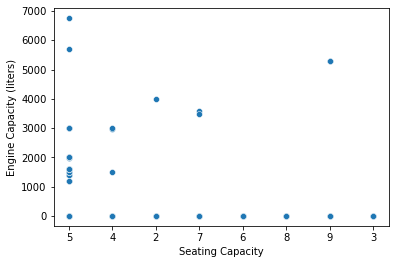

In [856]:
sns.scatterplot(x = 'Seating Capacity', y = 'Engine Capacity (liters)', data = ksa_main)

##### in the above plot we can see that most cars have 5 seats with an engine capacity between 1000-3000 inclusive. And the largest is 9 seater with 5000 engine capacity.

#### Lets observe the heatmap and pairplot for KSA main features.

<AxesSubplot:>

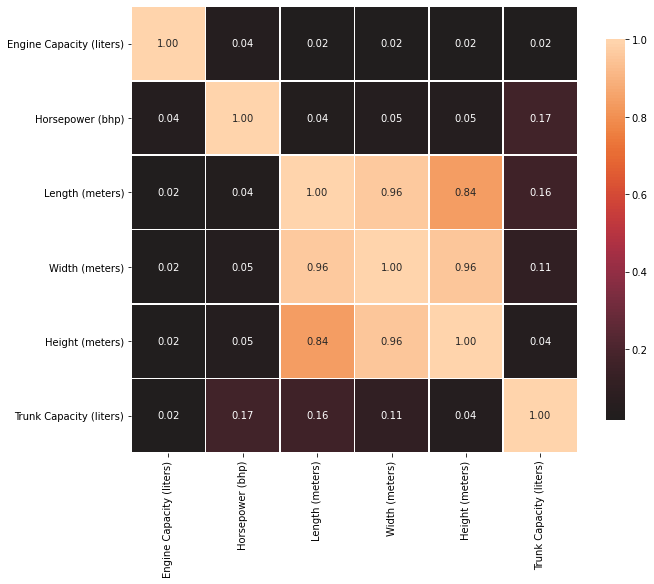

In [858]:
corr = ksa_main.corr(method='pearson').abs()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

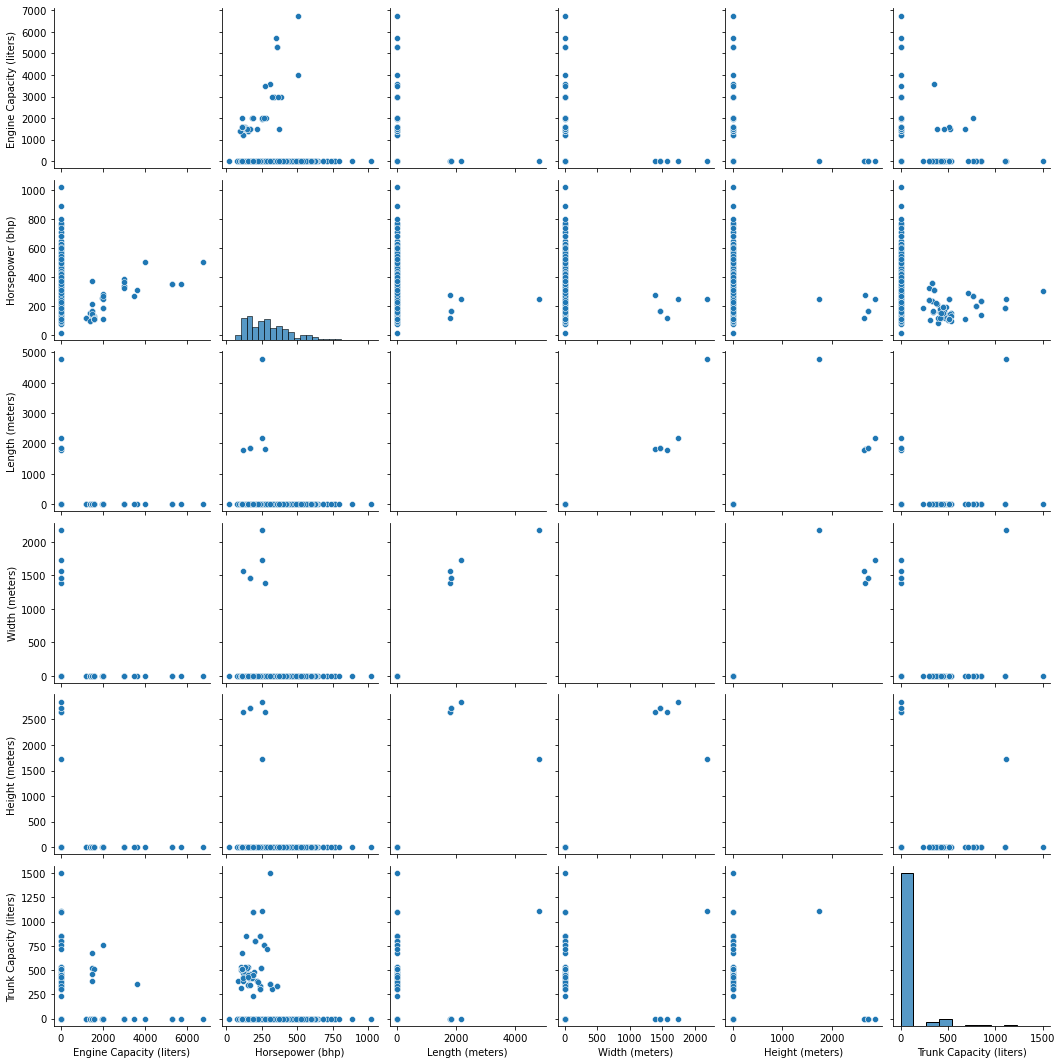

In [857]:
sns.pairplot(ksa_main)

In [1106]:
col = 'Drive Type'
dummies = pd.get_dummies(ksa_main[col])
ksa_main = pd.concat([ksa_main, dummies], axis=1)
ksa_main.drop(col, axis=1, inplace=True)


col = 'country'
dummies = pd.get_dummies(ksa_main[col])
ksa_main = pd.concat([ksa_main, dummies], axis=1)
ksa_main.drop(col, axis=1, inplace=True)


col = 'Fuel Type'
dummies = pd.get_dummies(ksa_main[col])
ksa_main = pd.concat([ksa_main, dummies], axis=1)
ksa_main.drop(col, axis=1, inplace=True)


col = 'Transmission'
dummies = pd.get_dummies(ksa_main[col])
ksa_main = pd.concat([ksa_main, dummies], axis=1)
ksa_main.drop(col, axis=1, inplace=True)

col = 'currency'
dummies = pd.get_dummies(ksa_main[col])
ksa_main = pd.concat([ksa_main, dummies], axis=1)
ksa_main.drop(col, axis=1, inplace=True)

In [1107]:
ksa_main.head()

,name,price,Engine Capacity (liters),Cylinders,Horsepower (bhp),Torque (Nm),Seating Capacity,Length (meters),Width (meters),Height (meters),...,Rear Wheel Drive,ksa,Diesel,Electric,Hybrid,Petrol,Automatic,CVT,Manual,SAR
1,Ford Taurus 2021 2.0L EcoBoost Trend,135174,2.0,4,240.0,366,5,2.177,1.541,2.868,...,0,1,0,0,0,1,1,0,0,1
14,Ferrari GTC4Lusso 2021 6.3L V12,DISCONTINUED,2981.0,6,385.0,450,4,1.852,1.298,2.450,...,1,1,0,0,0,1,1,0,0,1
18,Porsche Cayenne Coupe 2021 S,452014,2.0,4,246.0,365,5,2.070,1.664,2.874,...,0,1,0,0,0,1,1,0,0,1
32,Audi Q7 2021 40 TFSI Design quattro (252 HP),303600,2.5,4,350.0,420,2,1.801,1.295,2.475,...,1,1,0,0,0,1,1,0,0,1
54,Mercedes-Benz AMG GT 2021 4.0L,572000,1.6,4,115.0,156,5,1.814,1.443,2.711,...,0,1,0,0,0,1,1,0,0,1


In [1108]:
ksa_main = ksa_main.drop('Wheelbase (meters)', 1)
colms = ksa_main.columns
feature = list(colms[1:])

In [1109]:
ksa_main.dropna(inplace=True)
ksa_main = ksa_main[ksa_main['price'] != 'DISCONTINUED']
ksa_main = ksa_main[ksa_main['price'] != 'TBD']

for i in feature:
    ksa_main[i] = ksa_main[i].astype(float)
ksa_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 1 to 7777
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      676 non-null    object 
 1   price                     676 non-null    float64
 2   Engine Capacity (liters)  676 non-null    float64
 3   Cylinders                 676 non-null    float64
 4   Horsepower (bhp)          676 non-null    float64
 5   Torque (Nm)               676 non-null    float64
 6   Seating Capacity          676 non-null    float64
 7   Length (meters)           676 non-null    float64
 8   Width (meters)            676 non-null    float64
 9   Height (meters)           676 non-null    float64
 10  Trunk Capacity (liters)   676 non-null    float64
 11  All Wheel Drive           676 non-null    float64
 12  Front Wheel Drive         676 non-null    float64
 13  Rear Wheel Drive          676 non-null    float64
 14  ksa      

<AxesSubplot:>

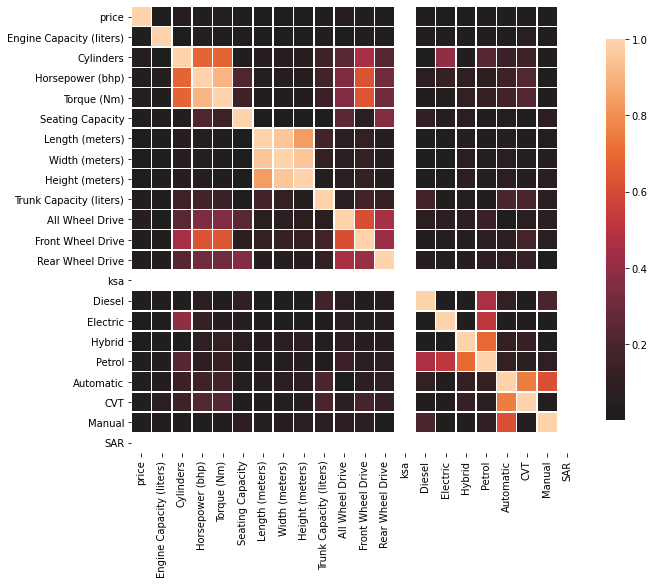

In [1110]:
corr = ksa_main.corr(method='pearson').abs()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=False, cbar_kws={"shrink": .70})

In [1111]:
X = list(ksa_main.columns[2:])
Xdf = ksa_main[X]
ydf = list(ksa_main['price'])

X, X_test, y, y_test = train_test_split(Xdf, ydf, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [1112]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.01493582776932012

In [1113]:
# Score on validation set
lr.score(X_val,y_val)

-0.09651429796754996

In [1114]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.11895355034284183

In [1115]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

-1814548.3184860435

### Fancy

In [1116]:
feature = ksa_fancy.columns[4:]
ksa_fancy = ksa_fancy[ksa_fancy['price'] != 'DISCONTINUED']
ksa_fancy = ksa_fancy[ksa_fancy['price'] != 'TBD']
ksa_fancy['price'] = ksa_fancy['price'].astype(float)

X = feature
y = list(ksa_fancy['price'])

In [1117]:
Xdf = ksa_fancy[X]
ydf = ksa_fancy['price']

X, X_test, y, y_test = train_test_split(Xdf, ydf, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [1118]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.10245386096759057

In [1119]:
lr.score(X_val,y_val)

-0.9881837528490198

In [1120]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.965686731392671

In [1121]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

-1.5364938470947068e+21

<AxesSubplot:>

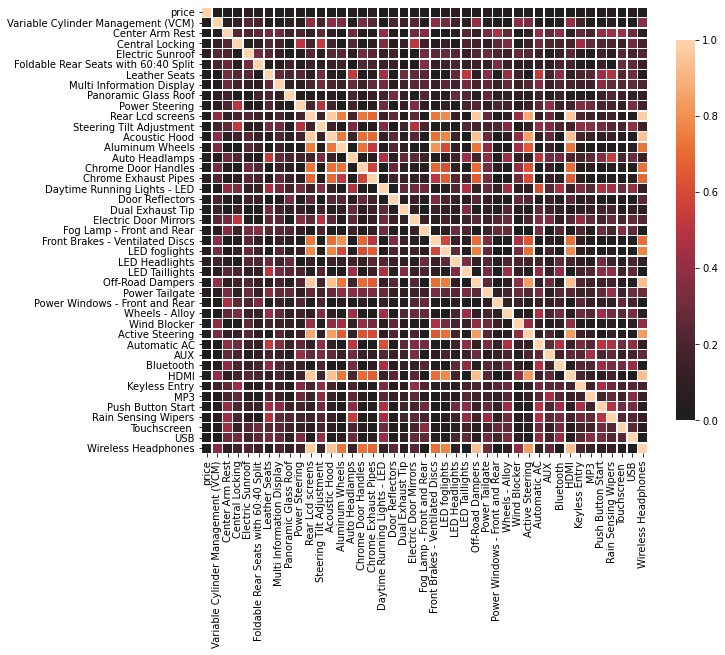

In [1122]:
corr = ksa_fancy.corr(method='pearson').abs()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=False, cbar_kws={"shrink": .70})

In [1124]:
for i in feature:
    print(i)

Variable Cylinder Management (VCM)
Center Arm Rest
Central Locking
Electric Sunroof
Foldable Rear Seats with 60:40 Split
Leather Seats
Multi Information Display
Panoramic Glass Roof
Power Steering
Rear Lcd screens
Steering Tilt Adjustment
Acoustic Hood
Aluminum Wheels
Auto Headlamps
Chrome Door Handles
Chrome Exhaust Pipes
Daytime Running Lights - LED
Door Reflectors
Dual Exhaust Tip
Electric Door Mirrors
Fog Lamp - Front and Rear
Front Brakes - Ventilated Discs
LED foglights
LED Headlights
LED Taillights
Off-Road Dampers
Power Tailgate
Power Windows - Front and Rear
Wheels - Alloy
Wind Blocker
Active Steering
Automatic AC
AUX
Bluetooth
HDMI
Keyless Entry
MP3
Push Button Start
Rain Sensing Wipers
Touchscreen 
USB
Wireless Headphones


In [1132]:
wireless = ['Variable Cylinder Management (VCM)', 'Rear Lcd screens',
            'Acoustic Hood', 'Aluminum Wheels', 'Chrome Door Handles',
            'Chrome Exhaust Pipes', 'Front Brakes - Ventilated Discs',
            'LED foglights', 'LED Headlights','LED Taillights', 'Wind Blocker', 'Active Steering', 'HDMI']
X = wireless
y = list(ksa_fancy['Wireless Headphones'])

Xdf = ksa_fancy[X]
ydf = ksa_fancy['Wireless Headphones']

X, X_test, y, y_test = train_test_split(Xdf, ydf, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9611730674033486

In [1133]:
lr.score(X_val,y_val)

0.9208758366025387

In [1134]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.979240192692614

In [1135]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

0.9151447206085213

### Safey

In [1145]:
feature = ksa_safety.columns[4:]
print(feature)
ksa_safety = ksa_safety[ksa_safety['price'] != 'DISCONTINUED']
ksa_safety = ksa_safety[ksa_safety['price'] != 'TBD']
ksa_safety['price'] = ksa_safety['price'].astype(float)

X = feature

Index(['ABS (Anti-lock Brake System)', 'Airbags', 'Anti theft alarm',
       'BA (Brake Assist)', 'Collision Detection', 'Differential Lock',
       'EBD (Electronic Brakeforce Distribution)', 'Fire Extinguisher',
       'First Aid Kit', 'Gas Shock Absorber', 'Hill Assist',
       'Hill Descent Control ', 'Immobilizer', 'ISO Fix Child Seat Anchors',
       'Lane Departure Warning', 'Multi Terrain Select',
       'Parking Sensors - Front and Rear', 'Pedestrian airbag', 'Rear Camera',
       'Surround Camera', 'Tire Pressure Monitoring Display',
       'Traction Control'],
      dtype='object')


In [1146]:
Xdf = ksa_safety[X]
ydf = ksa_safety['price']

X, X_test, y, y_test = train_test_split(Xdf, ydf, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [1147]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.030609815600892154

In [1148]:
lr.score(X_val,y_val)

-1.771672305147765e+25

<AxesSubplot:>

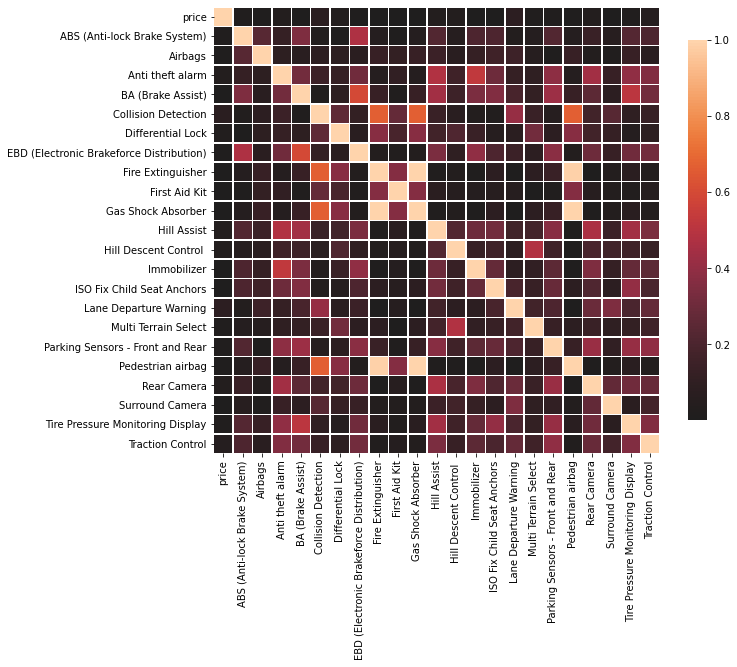

In [1150]:
corr = ksa_safety.corr(method='pearson').abs()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=False, cbar_kws={"shrink": .70})

In [1162]:
control = ['Anti theft alarm',
       'BA (Brake Assist)','EBD (Electronic Brakeforce Distribution)', 'Hill Assist',
       'Hill Descent Control ', 'Immobilizer', 'ISO Fix Child Seat Anchors',
       'Lane Departure Warning', 'Multi Terrain Select',
       'Parking Sensors - Front and Rear', 'Rear Camera',
       'Surround Camera', 'Tire Pressure Monitoring Display']

X = control
y = list(ksa_safety['Traction Control'])

Xdf = ksa_safety[X]
ydf = ksa_safety['Traction Control']

X, X_test, y, y_test = train_test_split(Xdf, ydf, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.2996951112908671

In [1163]:
lr.score(X_val,y_val)

0.28861457095289833

In [1164]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.5432170985187945

In [1165]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

-6.064774984969399e+18